<a href="https://colab.research.google.com/github/StetskoSergey/pida5_stetsko/blob/master/mds_homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pylab as pl
import warnings

from matplotlib import pyplot as plt
from scipy import linalg
from sklearn.datasets import load_digits
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

### Задание 1:

Придумайте матрицы, которые обладают следующими свойствами:

a) диагональная, ортогональная, но не единичная(!):

b) верхнетреугольная, ортогональная:

c) нижнетреугольная, ортогональная: 

d) матрица, у которой определитель = 1, и все элементы не равны 0:

e) матрица (3x3), у которой определитель = 1:

Ортогона́льная ма́трица — квадратная матрица A с вещественными элементами, результат умножения которой на транспонированную матрицу A
 равен единичной матрице:

AA^=A^A=E




P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!

In [7]:
A = np.diag([-1,-1,-1])
np.dot(A, np.transpose(A))

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [2]:
A = np.triu([[1, -1, 0],[0,1, 1], [0, 0, 1]], 0)
print(A)
np.dot(A, np.transpose(A))

[[ 1 -1  0]
 [ 0  1  1]
 [ 0  0  1]]


array([[ 2, -1,  0],
       [-1,  2,  1],
       [ 0,  1,  1]])

Верхне треугольной и Нижнетреугольной ортогональной матрицы построить нельзя, так как элементы не могут дать 0 на боковых гранях при умножении. Транспонированная верхнетреугольная матрица дает - нижнетреугольную матрицу.

In [0]:
m = np.array([[1, 2, 1], [1, 1, 4], [2, 3, 4]], dtype=np.float32)
det = np.linalg.det(m)
print(m)
print(det)

[[1. 2. 1.]
 [1. 1. 4.]
 [2. 3. 4.]]
1.0


### Задание 2:

Найдите собственные значения и собственные вектора матриц (необходимо решение на numpy и честное решение на бумаге:)

In [30]:
m = np.array([[2, 2],
              [1, 3]])
print(m)

[[2 2]
 [1 3]]


In [31]:
w, v = np.linalg.eig(m)

for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(np.transpose(v)[i]))

Собственное значение 1.0
соответствующий ему собственный вектор [-0.89442719  0.4472136 ]
Собственное значение 4.0
соответствующий ему собственный вектор [-0.70710678 -0.70710678]


det ( 2-l, 2, 1, 3 - l) = 0

(2-l)(3-l) - 2 = 0

l^2 -5l + 4 = 0

корни 1 и 4

собственные вектора
( x + 2y = 0 )
( x - y  =0 ) 

( 2, -1) ( 1 1 )

Для данного примера в честном решении можно "угадать" корни многочлена 3-ей степени, посмотрев на решение на numpy

In [8]:
m = np.array([[4, 1, -1],
              [1, 4, -1],
              [-1, -1, 4]])
print(m)

[[ 4  1 -1]
 [ 1  4 -1]
 [-1 -1  4]]


In [10]:
w, v = np.linalg.eig(m)

for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(np.transpose(v)[i]))

Собственное значение 5.999999999999998
соответствующий ему собственный вектор [-0.57735027 -0.57735027  0.57735027]
Собственное значение 2.9999999999999982
соответствующий ему собственный вектор [-0.81649658  0.40824829 -0.40824829]
Собственное значение 2.9999999999999996
соответствующий ему собственный вектор [0.15430335 0.6172134  0.77151675]


4x + y -z = l x

x +4y -z = l y

-x - y +4 z = l z

выражаем в первых двух уровнениях x через y

(3 - l) x = (3- l) y

(3 - l) y = (3 - l) z

откуда собственный вектор x = y = z и l любая 
или l = 3 тогда x + y -z = 0 
и собственные вектора ( -2  1 -1 ), ( 1 5.5 6.5 ) 



### Задание 3:

Найдите спектральное разложение матрицы (честное решение на бумаге и на numpy)

In [14]:
m = np.array([[1, 2],
              [2,3]])
print(m)

[[1 2]
 [2 3]]


In [22]:
u, s, vh = np.linalg.svd(m, full_matrices=True)
print('Eigenvalues:')
print(np.diag(s))
print('\nEigenvectors:')
print(u)

Eigenvalues:
[[4.23606798 0.        ]
 [0.         0.23606798]]

Eigenvectors:
[[-0.52573111 -0.85065081]
 [-0.85065081  0.52573111]]


In [26]:
print(np.dot(u, np.dot(np.diag(s), vh)))

[[1. 2.]
 [2. 3.]]



столбцы матрицы U являются собственными векторами матрицы AA^T

матрица AA^T
(5 8)

(8 13)

собственные вектора

(5-l)x + 8y = 0
8x + (13 - l) y = 0
1- 18l +l^2 = 0

l = 0,055 l = 17,94

собственные вектора - (-0,52 -0,85), (-0,85 0,52 )

квадраты сингулярных чисел являются ее собственными числами, значит берем корни от собсвенных числел, получаем диагональную матрицу

(0,234 4,23)


### Задание 4:

Для примера из лекции постройте график зависимости oob_score RandomForestClassifier от количества компонент при сжатии с помощью SVD

In [0]:
import numpy as np
import pylab as pl
import warnings

from matplotlib import pyplot as plt
from scipy import linalg
from sklearn.datasets import load_digits
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

In [0]:
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

In [0]:
X, y = load_digits(return_X_y=True)

In [35]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


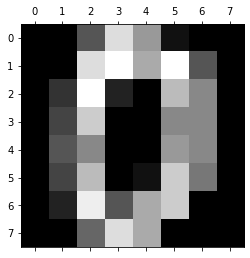

In [46]:
image = X[0]
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'gray')
plt.show()

In [0]:
def TruncClassifier(n_components=5):
  svd = TruncatedSVD(n_components = n_components)
  X_reduced = svd.fit_transform(X)
  #svd.explained_variance_ratio_.sum()
  rf_reduced = RandomForestClassifier(oob_score=True)
  rf_reduced.fit(X_reduced, y)
  return rf_reduced.oob_score_

In [50]:
TruncClassifier()

0.8074568725653868

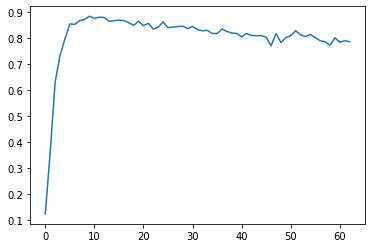

In [61]:
plt.plot([TruncClassifier(n_components=i) for i in range(1,X.shape[1])])
plt.show()

оптимальное значние размера матрицы приближения - 10
